## Soal No. 2: Membangun Logika Fuzzy Metode Sugeno

In [3]:
# Fungsi untuk menghitung derajat keanggotaan (membership function)
def trapezoid(x, a, b, c, d):
    if x <= a or x >= d:
        return 0
    elif a < x < b:
        return (x - a) / (b - a)
    elif b <= x <= c:
        return 1
    elif c < x < d:
        return (d - x) / (d - c)

def triangle(x, a, b, c):
    if x <= a or x >= c:
        return 0
    elif a < x < b:
        return (x - a) / (b - a)
    elif b <= x < c:
        return (c - x) / (c - b)

# Definisi variabel fuzzy dengan fungsi keanggotaan
def biaya_membership(x):
    return {
        "rendah": trapezoid(x, 900000, 900000, 4000000, 8000000),
        "sedang": triangle(x, 4000000, 8000000, 12000000),
        "tinggi": trapezoid(x, 8000000, 12000000, 16600000, 16600000)
    }

def permintaan_membership(x):
    return {
        "rendah": trapezoid(x, 50, 50, 150, 250),
        "sedang": triangle(x, 150, 250, 350),
        "tinggi": trapezoid(x, 250, 350, 485, 485)
    }

def stok_membership(x):
    return {
        "rendah": trapezoid(x, 5, 5, 50, 100),
        "sedang": triangle(x, 50, 100, 150),
        "tinggi": trapezoid(x, 100, 150, 230, 230)
    }

# Aturan fuzzy Sugeno
def sugeno_rules(biaya, permintaan, stok):
    rules = [
        (min(permintaan['tinggi'], stok['rendah']), "tinggi"),
        (min(permintaan['tinggi'], stok['sedang']), "sedang"),
        (min(permintaan['rendah'], stok['tinggi']), "rendah"),
        (min(permintaan['sedang'], stok['rendah']), "sedang"),
        (biaya['tinggi'], "rendah"),
        (biaya['rendah'], "tinggi")
    ]
    return rules

# Nilai konsekuen Sugeno untuk output produksi
def produksi_sugeno(value):
    konsekuen_values = {
        "rendah": 150,
        "sedang": 250,
        "tinggi": 400
    }
    return konsekuen_values[value]

# Defuzzifikasi menggunakan rata-rata berbobot
def defuzzifikasi(rules):
    total_weighted_output = 0
    total_weight = 0
    for rule_strength, output_category in rules:
        konsekuen_value = produksi_sugeno(output_category)
        total_weighted_output += rule_strength * konsekuen_value
        total_weight += rule_strength
    if total_weight == 0:
        return 0
    return total_weighted_output / total_weight

# Input data untuk bulan Maret 2017
biaya_current = 6000000  # Biaya produksi
permintaan_current = 320  # Permintaan
stok_current = 60         # Stok

# Hitung derajat keanggotaan masing-masing input
biaya_fuzzy = biaya_membership(biaya_current)
permintaan_fuzzy = permintaan_membership(permintaan_current)
stok_fuzzy = stok_membership(stok_current)

# Terapkan aturan Sugeno
rules = sugeno_rules(biaya_fuzzy, permintaan_fuzzy, stok_fuzzy)

# Hitung hasil produksi
hasil_produksi = defuzzifikasi(rules)

print(f"Jumlah kain tenun yang harus diproduksi: {hasil_produksi} perbiji")


Jumlah kain tenun yang harus diproduksi: 355.88235294117646 perbiji


In [4]:
# Define the input values (current values for cost, demand, and stock)
biaya_current = 6000000   # Biaya produksi
permintaan_current = 320  # Permintaan
stok_current = 60         # Stok

# Define the fuzzy sets for each input
biaya_low = [900000, 900000, 4000000, 8000000]
biaya_medium = [4000000, 8000000, 12000000]
biaya_high = [8000000, 12000000, 16600000, 16600000]

permintaan_low = [50, 50, 150, 250]
permintaan_medium = [150, 250, 350]
permintaan_high = [250, 350, 485, 485]

stok_low = [5, 5, 50, 100]
stok_medium = [50, 100, 150]
stok_high = [100, 150, 230, 230]

# Define the input membership function
def fuzzy_membership(value, low, medium, high):
    def safe_div(numerator, denominator):
        return numerator / denominator if denominator != 0 else 0

    low_value = max(0, min(safe_div(value - low[0], low[1] - low[0]), 1, safe_div(low[3] - value, low[3] - low[2]))) if len(low) == 4 else max(0, min(safe_div(value - low[0], low[1] - low[0]), safe_div(low[2] - value, low[2] - low[1])))
    medium_value = max(0, min(safe_div(value - medium[0], medium[1] - medium[0]), 1, safe_div(medium[2] - value, medium[2] - medium[1])))
    high_value = max(0, min(safe_div(value - high[0], high[1] - high[0]), 1, safe_div(high[3] - value, high[3] - high[2]))) if len(high) == 4 else max(0, min(safe_div(value - high[0], high[1] - high[0]), safe_div(high[2] - value, high[2] - high[1])))
    
    return [low_value, medium_value, high_value]

# Calculate the membership values for the input values
biaya_membership = fuzzy_membership(biaya_current, biaya_low, biaya_medium, biaya_high)
permintaan_membership = fuzzy_membership(permintaan_current, permintaan_low, permintaan_medium, permintaan_high)
stok_membership = fuzzy_membership(stok_current, stok_low, stok_medium, stok_high)

# Define the fuzzy rules and their corresponding output values (more detailed)
rules = [
    (biaya_membership[0] * permintaan_membership[2] * stok_membership[0], 400),  # High production
    (biaya_membership[0] * permintaan_membership[1] * stok_membership[1], 350),  # Moderately high production
    (biaya_membership[1] * permintaan_membership[2] * stok_membership[0], 370),  # Almost high production
    (biaya_membership[1] * permintaan_membership[1] * stok_membership[1], 300),  # Medium-high production
    (biaya_membership[1] * permintaan_membership[0] * stok_membership[2], 250),  # Medium production
    (biaya_membership[2] * permintaan_membership[1] * stok_membership[0], 220),  # Low-medium production
    (biaya_membership[2] * permintaan_membership[0] * stok_membership[2], 150),  # Low production
]

# Calculate the weighted average of the rules
numerator = sum(weight * output for weight, output in rules)
denominator = sum(weight for weight, _ in rules)

# Calculate the final result (Sugeno model)
if denominator != 0:
    hasil_produksi = numerator / denominator
else:
    hasil_produksi = 0  # Handle the case where the denominator is 0

# Output the recommended production amount
print("Jumlah kain tenun yang harus diproduksi:", hasil_produksi, "biji")


Jumlah kain tenun yang harus diproduksi: 300.0 biji


C:\Users\JuhenFW\AppData\Local\Temp\ipykernel_19044\1622792785.py:6: RuntimeWarning: divide by zero encountered in divide
  return np.maximum(0, np.minimum((x - a) / (b - a), np.minimum(1, (d - x) / (d - c))))
C:\Users\JuhenFW\AppData\Local\Temp\ipykernel_19044\1622792785.py:6: RuntimeWarning: invalid value encountered in divide
  return np.maximum(0, np.minimum((x - a) / (b - a), np.minimum(1, (d - x) / (d - c))))


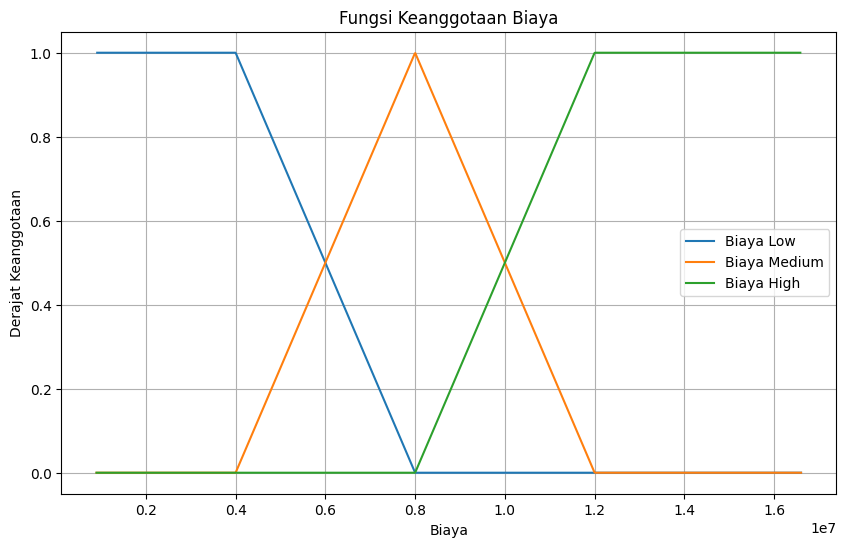

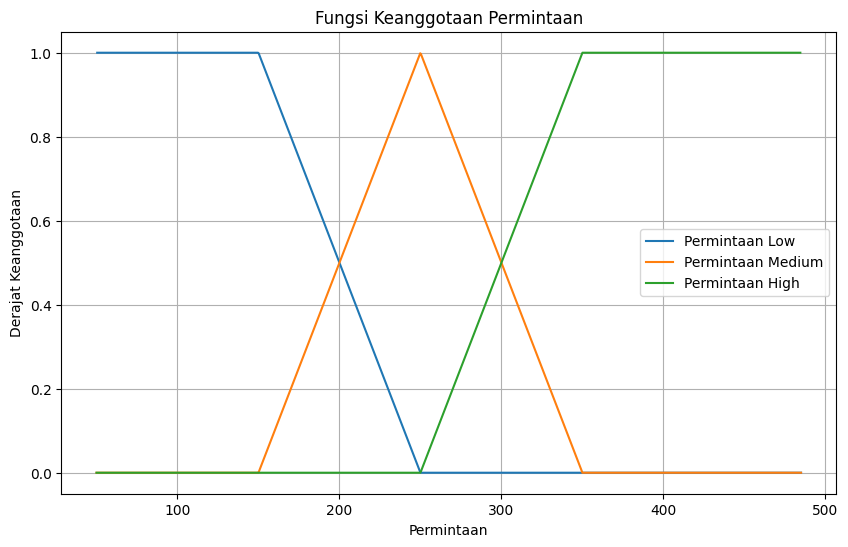

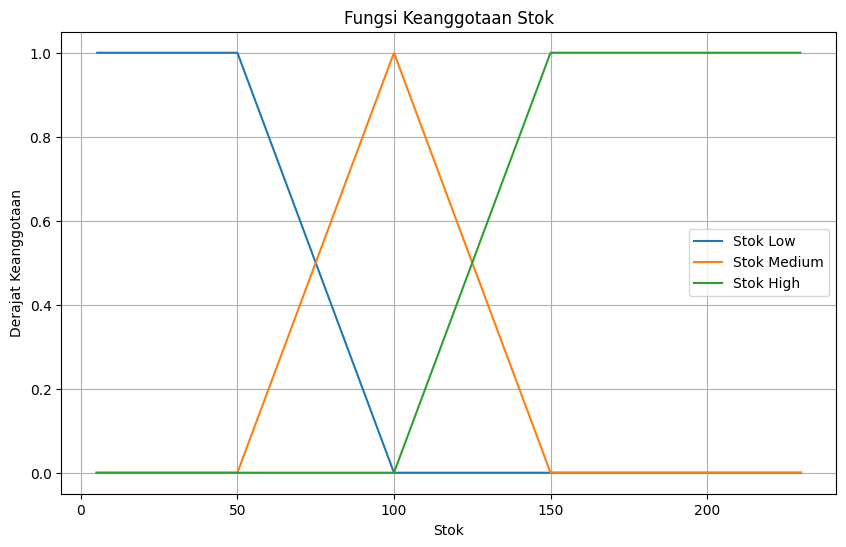

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk membuat membership function trapezoidal
def trapezoidal(x, a, b, c, d):
    return np.maximum(0, np.minimum((x - a) / (b - a), np.minimum(1, (d - x) / (d - c))))

# Fungsi untuk membuat membership function triangular
def triangular(x, a, b, c):
    return np.maximum(0, np.minimum((x - a) / (b - a), (c - x) / (c - b)))

# Rentang nilai untuk masing-masing variabel
x_biaya = np.linspace(900000, 16600000, 1000)
x_permintaan = np.linspace(50, 485, 1000)
x_stok = np.linspace(5, 230, 1000)

# Plot untuk Biaya
plt.figure(figsize=(10, 6))
plt.plot(x_biaya, trapezoidal(x_biaya, 900000, 900000, 4000000, 8000000), label='Biaya Low')
plt.plot(x_biaya, triangular(x_biaya, 4000000, 8000000, 12000000), label='Biaya Medium')
plt.plot(x_biaya, trapezoidal(x_biaya, 8000000, 12000000, 16600000, 16600000), label='Biaya High')
plt.title('Fungsi Keanggotaan Biaya')
plt.xlabel('Biaya')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)

# Plot untuk Permintaan
plt.figure(figsize=(10, 6))
plt.plot(x_permintaan, trapezoidal(x_permintaan, 50, 50, 150, 250), label='Permintaan Low')
plt.plot(x_permintaan, triangular(x_permintaan, 150, 250, 350), label='Permintaan Medium')
plt.plot(x_permintaan, trapezoidal(x_permintaan, 250, 350, 485, 485), label='Permintaan High')
plt.title('Fungsi Keanggotaan Permintaan')
plt.xlabel('Permintaan')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)

# Plot untuk Stok
plt.figure(figsize=(10, 6))
plt.plot(x_stok, trapezoidal(x_stok, 5, 5, 50, 100), label='Stok Low')
plt.plot(x_stok, triangular(x_stok, 50, 100, 150), label='Stok Medium')
plt.plot(x_stok, trapezoidal(x_stok, 100, 150, 230, 230), label='Stok High')
plt.title('Fungsi Keanggotaan Stok')
plt.xlabel('Stok')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)

plt.show()
